In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загружаем датасет
df = pd.read_csv('covid_data.csv')

In [3]:
# шапка датасета
print(df.head())

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


In [4]:
# информация о датасете
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB
None


In [5]:
# Статистический анализ
print(df.describe())

                 SNo     Confirmed         Deaths     Recovered
count  306429.000000  3.064290e+05  306429.000000  3.064290e+05
mean   153215.000000  8.567091e+04    2036.403268  5.042029e+04
std     88458.577156  2.775516e+05    6410.938048  2.015124e+05
min         1.000000 -3.028440e+05    -178.000000 -8.544050e+05
25%     76608.000000  1.042000e+03      13.000000  1.100000e+01
50%    153215.000000  1.037500e+04     192.000000  1.751000e+03
75%    229822.000000  5.075200e+04    1322.000000  2.027000e+04
max    306429.000000  5.863138e+06  112385.000000  6.399531e+06


In [6]:
# Исследование категориальных признаков
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f"Уникальные значения для {feature}:")
    print(df[feature].value_counts())

Уникальные значения для ObservationDate:
ObservationDate
05/29/2021    765
02/22/2021    765
02/24/2021    765
02/25/2021    765
02/26/2021    765
             ... 
01/26/2020     49
01/23/2020     48
01/25/2020     46
01/24/2020     43
01/22/2020     40
Name: count, Length: 494, dtype: int64
Уникальные значения для Province/State:
Province/State
Unknown                         4123
Amazonas                        1109
Diamond Princess cruise ship     924
Grand Princess                   882
Punjab                           708
                                ... 
Harrison County, KY                1
Queens County, NY                  1
Johnson County, IA                 1
Unassigned Location, VT            1
Charlotte County, FL               1
Name: count, Length: 736, dtype: int64
Уникальные значения для Country/Region:
Country/Region
Russia                 30251
US                     26740
Japan                  18059
Mainland China         15758
India                  13182
     

In [7]:
# удалил столбцы в которых находилась дата, страна, штат, т.к. она не влият на результат (моё мнение)
del df["ObservationDate"]
del df["Last Update"]
del df["Province/State"]
del df["Country/Region"]

In [8]:
print(df.head())

   SNo  Confirmed  Deaths  Recovered
0    1        1.0     0.0        0.0
1    2       14.0     0.0        0.0
2    3        6.0     0.0        0.0
3    4        1.0     0.0        0.0
4    5        0.0     0.0        0.0


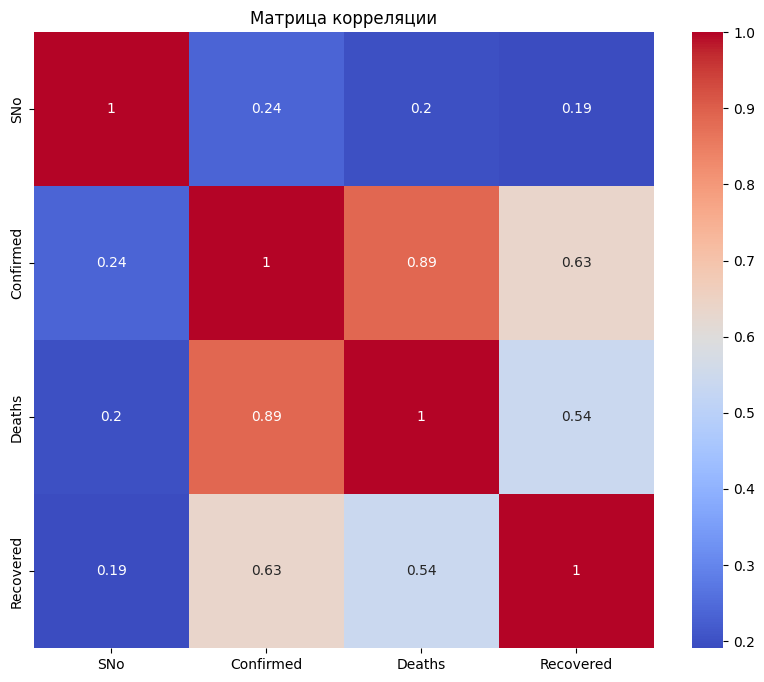

In [9]:
# Корреляция между числовыми признаками
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Матрица корреляции")
plt.show()

целевой признак - Deaths, т.к. именно его мы и хотим предсказывать

In [3]:
# загружаем датасет
df = pd.read_csv('covid_data.csv')
del df["ObservationDate"]
del df["Last Update"]
del df["Province/State"]
del df["Country/Region"]

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('Deaths', axis=1)
y = df['Deaths']

# разделение на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# создаю и обучаю модель
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Среднеквадратичная ошибка: {mse}")
print(f"Linear точность: {r2}")

Linear Среднеквадратичная ошибка: 8457298.7790281
Linear точность: 0.7881004393095432


In [5]:
from sklearn.linear_model import Lasso

# создаю и обучаю модель
lasso_model = Lasso(alpha=0.01) 
lasso_model.fit(X_train, y_train)


y_pred_lasso = lasso_model.predict(X_test)

# качество модели 
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Среднеквадратичная ошибка: {mse_lasso}")
print(f"Lasso точность: {r2_lasso}")

Lasso Среднеквадратичная ошибка: 8457298.779033711
Lasso точность: 0.7881004393094027


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

# Создаю модели и её слои
model_nn = Sequential()
model_nn.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(units=32, activation='relu'))
model_nn.add(Dense(units=1, activation='linear'))

model_nn.compile(loss='mean_squared_error', optimizer='adam')

# Обучаю модели
model_nn.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# качество модели
mse_nn = model_nn.evaluate(X_test, y_test)
y_pred_nn = model_nn.predict(X_test)
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network Среднеквадратичная ошибка: {mse_nn}")
print(f"Neural Network точность: {r2_nn}")

Epoch 1/5
7661/7661 [==============================] - 14s 2ms/step - loss: 33963416.0000 - val_loss: 8842517.0000
Epoch 2/5
7661/7661 [==============================] - 14s 2ms/step - loss: 10549349.0000 - val_loss: 11153065.0000
Epoch 3/5
7661/7661 [==============================] - 14s 2ms/step - loss: 8322789.0000 - val_loss: 7955056.0000
Epoch 4/5
7661/7661 [==============================] - 14s 2ms/step - loss: 7995723.5000 - val_loss: 7627944.0000
Epoch 5/5
1916/1916 [==============================] - 2s 1ms/step - loss: 7386239.5000
Neural Network Среднеквадратичная ошибка: 7386239.5
1916/1916 [==============================] - 2s 1ms/step
Neural Network точность: 0.8149359397054693


In [5]:
# загружаем датасет
df = pd.read_csv('covid_data.csv')
del df["Province/State"]
del df["Country/Region"]

19:00:50 - cmdstanpy - INFO - Chain [1] start processing
19:01:09 - cmdstanpy - INFO - Chain [1] done processing
c:\ycheba\lab\7semestr\ml\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\ycheba\lab\7semestr\ml\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


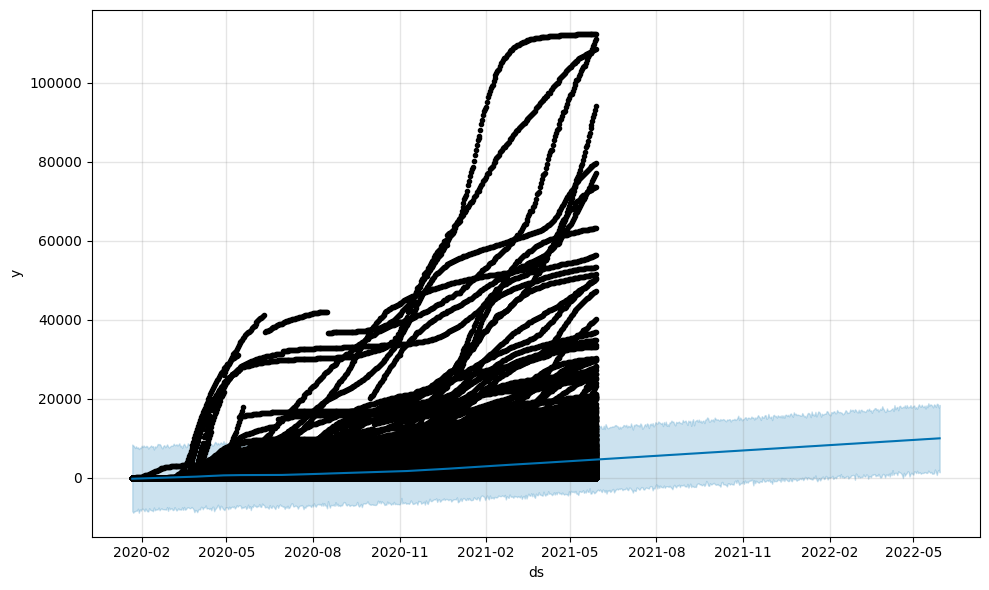

In [7]:
from prophet import Prophet

# переименовал столбцы чтобы Prophet работал
df_prophet = df.rename(columns={'ObservationDate': 'ds', 'Deaths': 'y'})

# создаю и обучаю модель
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Создаю датафрейм для прогноза будущих значений
future = model_prophet.make_future_dataframe(periods=365)  # Продолжение данных на 365 дней вперед

forecast = model_prophet.predict(future)

# Визуализация прогноза
fig = model_prophet.plot(forecast)

не особо понятно, что делает Prophet =/

с гиперпараметрами особо не игрался